# Part 2) Multidimensional fitting and data visualisation

Let's go back to dealing with toy models to show the capability of defining multi dimensional pdfs.

In [1]:
import ROOT as r

Welcome to JupyROOT 6.08/02



RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



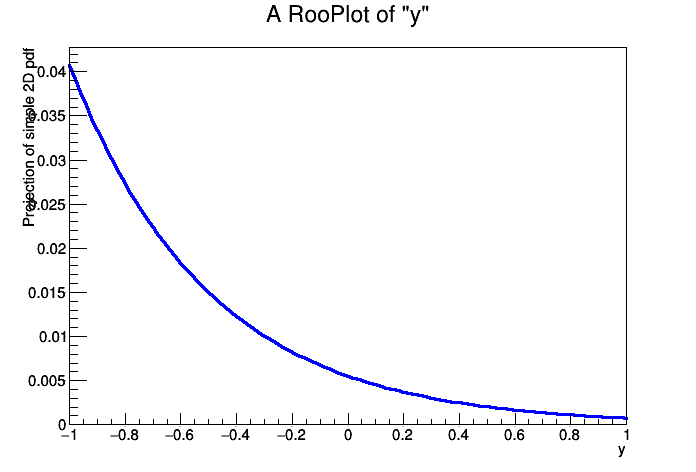

In [2]:
# independent variables
x = r.RooRealVar('x', 'x', -1.0, 1.0)
y = r.RooRealVar('y', 'y', -1.0, 1.0)

# model in x
wx = r.RooRealVar('wx', '#sigma_{x}', 0.1, 0.001, 0.5)
mx = r.RooRealVar('mx', '#sigma_{x}', 0.0)
gsx = r.RooGaussian('gsx', 'Gaussian model in x', x, mx, wx)

# model in y
ky = r.RooRealVar('ky', 'k_{y}', -2, -5, -0.1)
exy = r.RooExponential('exy', 'Exponential model in y', y, ky)

# combine
pdf = r.RooProdPdf('pdf', 'simple 2D pdf', gsx, exy)

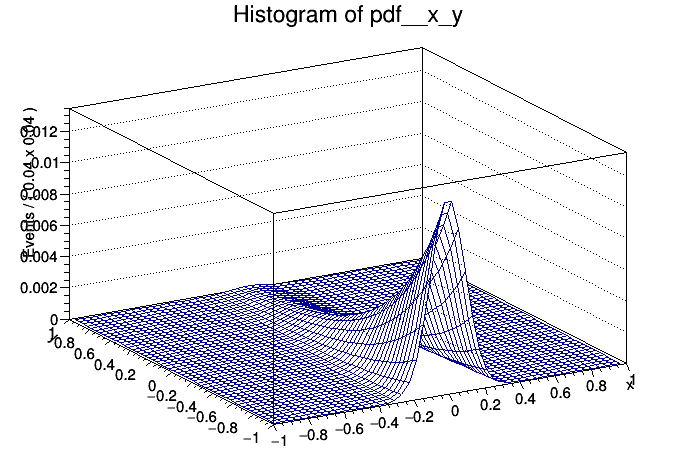

In [3]:

hpdf = pdf.createHistogram('x,y',50,50)
hpdf.Draw('surf')
hpdf.SetStats(0)
canvas.Draw()

In [4]:
toydata = pdf.generate(r.RooArgSet(x, y), 1000)

In [5]:
toydata.Print()

RooDataSet::pdfData[x,y] = 1000 entries


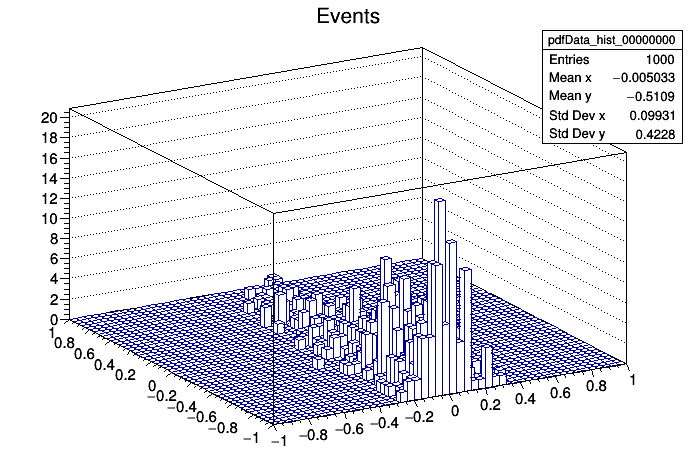

In [6]:
hds = toydata.createHistogram(x,y,50,50) # this will create a 'regular' TH2D
hds.Draw('lego')
hpdf.SetStats(0)
canvas.Draw()

In [7]:
pdf.fitTo(toydata)

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (gsx,exy)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 ky          -2.00000e+00  4.90000e-01   -5.00000e+00 -1.00000e-01
     2 wx           1.00000e-01  4.95000e-02    1.00000e-03  5.00000e-01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        1000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=-622.671 FROM MIGRAD    STATUS=INITIATE 

In [16]:
# check fitted projections
canvas = r.TCanvas()
xfr = x.frame() # RooPlot
yfr = y.frame()
xfr.SetTitle('Fitted projection in x')
yfr.SetTitle('Fitted projection in y')
toydata.plotOn(xfr)
toydata.plotOn(yfr)
pdf.plotOn(xfr)
pdf.plotOn(yfr)

<ROOT.RooPlot object ("frame_y_7f8d3064b3b0") at 0x7f8d3064b3b0>

[#1] INFO:Plotting -- RooAbsReal::plotOn(pdf) plot on x integrates over variables (y)
[#1] INFO:Plotting -- RooAbsReal::plotOn(pdf) plot on y integrates over variables (x)


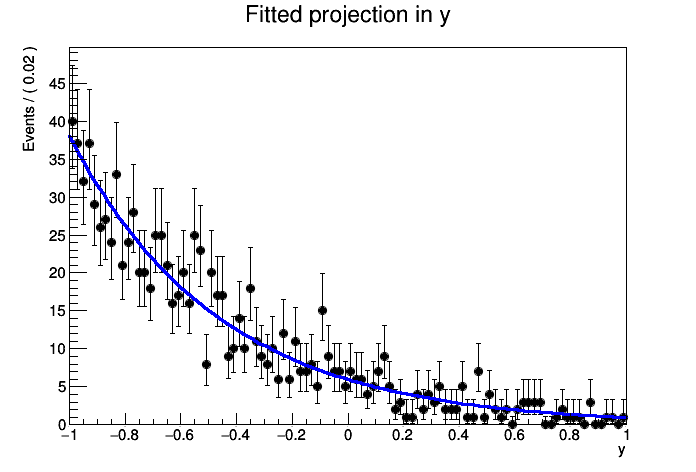

In [17]:
yfr.Draw()
canvas.Draw()

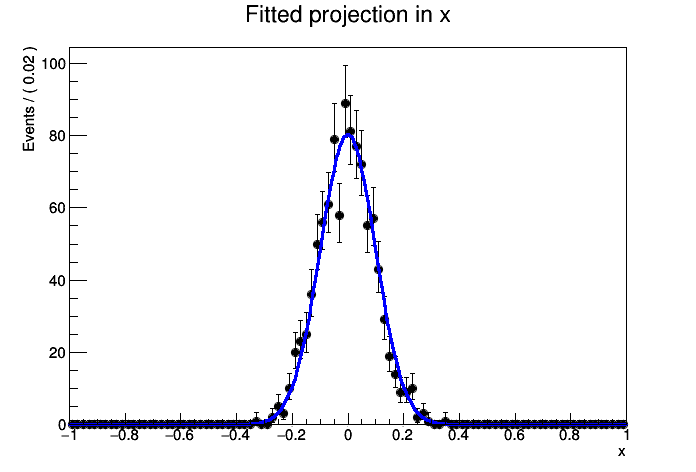

In [18]:
xfr.Draw()
canvas.Draw()